In [11]:
# Consider an American neighbourhood of N = 50 residents. Each resident
# identifies as democratic (D) or republican (R).
# The following four events can happen (with rates):

# A democratic randomly becomes republican, rate = 0.1D
# A republican randomly becomes democratic, rate = 0.1R
# A republican convinces a democratic to become republican, rate = 0.01DR
# A democratic convinces a republican to become democratic. rate = 0.01RD

# a
# Explain what the rates mean. Why are the ‘convincing‘ rates
# proportional to D · R?

# 0.1D:





In [12]:
# b
# Initialize a system with D = 25 and R = 25 and simulate the above
# rate system using the Gillespie method for 500,000 steps.
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
D = 25  # Initial number of Democrats
R = 25  # Initial number of Republicans
steps = 500000  # Number of simulation steps

# Initialize time and population arrays for recording data
time_array = np.zeros(steps + 1)
D_array = np.zeros(steps + 1)
R_array = np.zeros(steps + 1)

time_array[0] = 0
D_array[0] = D
R_array[0] = R

# Simulation loop
for i in range(1, steps + 1):
    # Calculate event rates
    rate_dem_to_rep = 0.1 * D
    rate_rep_to_dem = 0.1 * R
    rate_rep_convince_dem = 0.01 * D * R
    rate_dem_convince_rep = 0.01 * D * R
    total_rate = rate_dem_to_rep + rate_rep_to_dem + rate_rep_convince_dem + rate_dem_convince_rep

    # Calculate time increment
    delta_t = -np.log(np.random.random()) / total_rate

    # Determine which event occurs next
    event_probs = np.array([rate_dem_to_rep, rate_rep_to_dem, rate_rep_convince_dem, rate_dem_convince_rep]) / total_rate
    event = np.random.choice(4, p=event_probs)

    # Update population based on the chosen event
    if event == 0:
        D -= 1
        R += 1
    elif event == 1:
        D += 1
        R -= 1
    elif event == 2:
        D -= 1
        R += 1
    else:
        D += 1
        R -= 1

    # Update arrays
    time_array[i] = time_array[i - 1] + delta_t
    D_array[i] = D
    R_array[i] = R





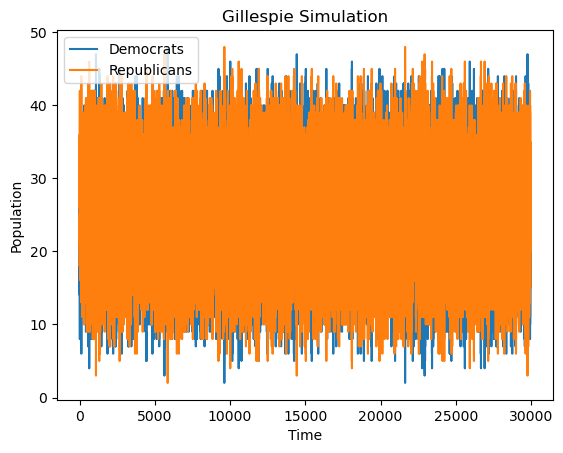

In [13]:
# c
# Plot D and R as a function of time and discuss the result.


# Plot the simulation results
plt.plot(time_array, D_array, label='Democrats')
plt.plot(time_array, R_array, label='Republicans')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Gillespie Simulation')
plt.legend()
plt.show()


In [14]:
# We now introduce a third type of resident: undecided (U). The rules
# are then updated such that when someone is convinced to leave their
# party, they become undecided, and thus needs to be convinced twice to be
# converted to the other party. The random rates are thus

# A democratic randomly becomes undecided, rate = 0.1D
# A republican randomly becomes undecided, rate = 0.1R
# An undecided randomly becomes democratic, rate = 0.05U
# An undecided randomly becomes republican, rate = 0.05U

# and the convincing rates

# A republican convinces a democratic to become undecided, rate = 0.01DR
# A republican convinces an undecided to become republican, rate = 0.01UR
# A democratic convinces a republican to become undecided, rate = 0.01RD
# A democratic convinces an undecided to become democratic. rate = 0.01UD


# Initialize a system with R = 0, U = 50 and D = 0 and simulate the
# above rate system using the Gillespie method for 500,000 steps

# d
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
D = 0    # Initial number of Democrats
R = 0    # Initial number of Republicans
U = 50   # Initial number of Undecided
steps = 500000  # Number of simulation steps

# Initialize time and population arrays for recording data
time_array = np.zeros(steps + 1)
D_array = np.zeros(steps + 1)
R_array = np.zeros(steps + 1)
U_array = np.zeros(steps + 1)

time_array[0] = 0
D_array[0] = D
R_array[0] = R
U_array[0] = U

# Simulation loop
for i in range(1, steps + 1):
    # Calculate event rates
    rate_dem_to_undecided = 0.1 * D
    rate_rep_to_undecided = 0.1 * R
    rate_undecided_to_dem = 0.05 * U
    rate_undecided_to_rep = 0.05 * U

    rate_rep_convince_dem = 0.01 * D * R
    rate_rep_convince_undecided = 0.01 * U * R
    rate_dem_convince_rep = 0.01 * D * R
    rate_dem_convince_undecided = 0.01 * U * D

    total_rate = (
        rate_dem_to_undecided + rate_rep_to_undecided + rate_undecided_to_dem + rate_undecided_to_rep +
        rate_rep_convince_dem + rate_rep_convince_undecided + rate_dem_convince_rep + rate_dem_convince_undecided
    )

    # Calculate time increment
    delta_t = -np.log(np.random.random()) / total_rate

    # Determine which event occurs next
    event_probs = np.array([
        rate_dem_to_undecided, rate_rep_to_undecided, rate_undecided_to_dem, rate_undecided_to_rep,
        rate_rep_convince_dem, rate_rep_convince_undecided, rate_dem_convince_rep, rate_dem_convince_undecided
    ]) / total_rate
    event = np.random.choice(8, p=event_probs)

    # Update population based on the chosen event
    if event == 0:
        D -= 1
        U += 1
    elif event == 1:
        R -= 1
        U += 1
    elif event == 2:
        U -= 1
        D += 1
    elif event == 3:
        U -= 1
        R += 1
    elif event == 4:
        D -= 1
        U += 1
    elif event == 5:
        U -= 1
        R += 1
    elif event == 6:
        R -= 1
        U += 1
    else:
        U -= 1
        D += 1

    # Update arrays
    time_array[i] = time_array[i - 1] + delta_t
    D_array[i] = D
    R_array[i] = R
    U_array[i] = U







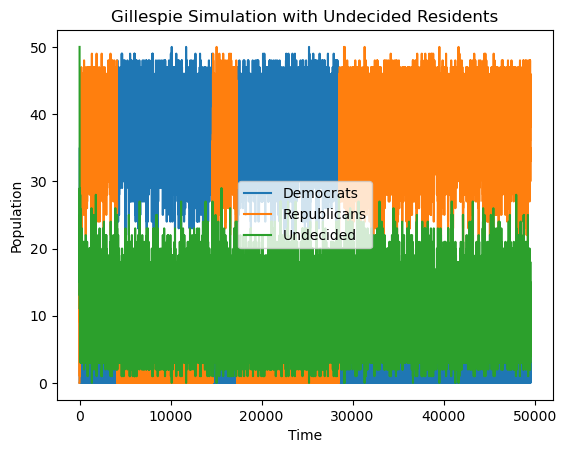

In [15]:
# Plot R and D as a function of time and discuss the result

# e

# Plot the simulation results
plt.plot(time_array, D_array, label='Democrats')
plt.plot(time_array, R_array, label='Republicans')
plt.plot(time_array, U_array, label='Undecided')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Gillespie Simulation with Undecided Residents')
plt.legend()
plt.show()